# Solar Policies through Suburban Profiling: A Melbourne Case Study
### Mirza Dowla

# Introduction
#### In this analysis, we will combine solar installation data with housing sales data from Melbourne to support data-driven decisions for future solar energy projects and policies. We will use data analytics techniques and Python to carry out the analysis, following the workflow outlined below:


1. Data import and preparation for extraction.

2. Extract the required data using Python and Pandas.

3. Normalisation of the extracted data using appropriate methodologies in Pandas.

4. Perform clustering and conduct analysis on the normalized data.

5. Hypothesis Development and Significance Testing.

6. conclusions.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Let you guess..
from sklearn.preprocessing import StandardScaler # Will be used to scale data if required
import numpy as np
from sklearn.decomposition import PCA
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import warnings
warnings.filterwarnings("ignore")

## 1. Data import and Preparation
### Data import and quality check

In [2]:
df1 = pd.read_csv (r"C:\Users\silve\Documents\DATA SCIENCE\Python\tafe\final\data\data\sgu-solar-capacity-2011-to-present.csv")
df2 = pd.read_csv (r"C:\Users\silve\Documents\DATA SCIENCE\Python\tafe\final\data\data\sgu-solar-installations-2011-to-present.csv")
df3 = pd.read_csv (r"C:\Users\silve\Documents\DATA SCIENCE\Python\tafe\final\data\data\MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df1.head(2)

,Small Unit Installation Postcode,Jan 2011 - SGU Rated Output In kW,Feb 2011 - SGU Rated Output In kW,Mar 2011 - SGU Rated Output In kW,Apr 2011 - SGU Rated Output In kW,May 2011 - SGU Rated Output In kW,Jun 2011 - SGU Rated Output In kW,Jul 2011 - SGU Rated Output In kW,Aug 2011 - SGU Rated Output In kW,Sep 2011 - SGU Rated Output In kW,...,Jul 2023 - SGU Rated Output In kW,Aug 2023 - SGU Rated Output In kW,Sep 2023 - SGU Rated Output In kW,Oct 2023 - SGU Rated Output In kW,Nov 2023 - SGU Rated Output In kW,Dec 2023 - SGU Rated Output In kW,Jan 2024 - SGU Rated Output In kW,Feb 2024 - SGU Rated Output In kW,Mar 2024 - SGU Rated Output In kW,Apr 2024 - SGU Rated Output In kW
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df1.shape

(2809, 161)

In [5]:
df2.head(2)

,Small Unit Installation Postcode,Jan 2011 - Installations Quantity,Feb 2011 - Installations Quantity,Mar 2011 - Installations Quantity,Apr 2011 - Installations Quantity,May 2011 - Installations Quantity,Jun 2011 - Installations Quantity,Jul 2011 - Installations Quantity,Aug 2011 - Installations Quantity,Sep 2011 - Installations Quantity,...,Jul 2023 - Installations Quantity,Aug 2023 - Installations Quantity,Sep 2023 - Installations Quantity,Oct 2023 - Installations Quantity,Nov 2023 - Installations Quantity,Dec 2023 - Installations Quantity,Jan 2024 - Installations Quantity,Feb 2024 - Installations Quantity,Mar 2024 - Installations Quantity,Apr 2024 - Installations Quantity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df2.shape

(2809, 161)

In [7]:
df3.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [8]:
df3.shape

(63023, 13)

In [9]:
df1.rename(columns={'Small Unit Installation Postcode': 'Postcode'}, inplace=True)
df1['Postcode'] = df1['Postcode'].astype('string').str.zfill(4)
df1.head(2)

,Postcode,Jan 2011 - SGU Rated Output In kW,Feb 2011 - SGU Rated Output In kW,Mar 2011 - SGU Rated Output In kW,Apr 2011 - SGU Rated Output In kW,May 2011 - SGU Rated Output In kW,Jun 2011 - SGU Rated Output In kW,Jul 2011 - SGU Rated Output In kW,Aug 2011 - SGU Rated Output In kW,Sep 2011 - SGU Rated Output In kW,...,Jul 2023 - SGU Rated Output In kW,Aug 2023 - SGU Rated Output In kW,Sep 2023 - SGU Rated Output In kW,Oct 2023 - SGU Rated Output In kW,Nov 2023 - SGU Rated Output In kW,Dec 2023 - SGU Rated Output In kW,Jan 2024 - SGU Rated Output In kW,Feb 2024 - SGU Rated Output In kW,Mar 2024 - SGU Rated Output In kW,Apr 2024 - SGU Rated Output In kW
0,0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df2.rename(columns={'Small Unit Installation Postcode': 'Postcode'}, inplace=True)
df2['Postcode'] = df2['Postcode'].astype('string').str.zfill(4)
df2.head(2)

,Postcode,Jan 2011 - Installations Quantity,Feb 2011 - Installations Quantity,Mar 2011 - Installations Quantity,Apr 2011 - Installations Quantity,May 2011 - Installations Quantity,Jun 2011 - Installations Quantity,Jul 2011 - Installations Quantity,Aug 2011 - Installations Quantity,Sep 2011 - Installations Quantity,...,Jul 2023 - Installations Quantity,Aug 2023 - Installations Quantity,Sep 2023 - Installations Quantity,Oct 2023 - Installations Quantity,Nov 2023 - Installations Quantity,Dec 2023 - Installations Quantity,Jan 2024 - Installations Quantity,Feb 2024 - Installations Quantity,Mar 2024 - Installations Quantity,Apr 2024 - Installations Quantity
0,0000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Data extraction and compilation

In [11]:
df_solar=df1.merge(df2,on='Postcode', how="left")
# joining df1 and df2 to create new dataframe with solar quantity and capacity by suburb
df_solar.shape



(2809, 321)

In [12]:
df_solar_unpivot = pd.melt(df_solar, id_vars=['Postcode'],var_name='Date', value_name='Value') 
#pandas.melt() to transform your DataFrame from wide format to long (tidy) format. This process is also called "unpivoting".
#id_vars=['Postcode']: Keeps the Postcode column as is (doesn’t melt it).
#var_name='Date': Renames the column that stores the former wide column headers (Jan 2016, Feb 2016, etc.).
#value_name='Value': Renames the column that stores the actual values (e.g., 5.2, 4.8...).

In [13]:
df_solar_unpivot

,Postcode,Date,Value
0,0000,Jan 2011 - SGU Rated Output In kW,0.0
1,0200,Jan 2011 - SGU Rated Output In kW,0.0
2,0800,Jan 2011 - SGU Rated Output In kW,0.0
3,0801,Jan 2011 - SGU Rated Output In kW,0.0
4,0803,Jan 2011 - SGU Rated Output In kW,0.0
...,...,...,...
898875,7470,Apr 2024 - Installations Quantity,0.0
898876,7802,Apr 2024 - Installations Quantity,0.0
898877,0811,Apr 2024 - Installations Quantity,0.0
898878,8576,Apr 2024 - Installations Quantity,0.0


In [14]:
df_solar_unpivot[['Date', 'Metric']] = df_solar_unpivot['Date'].str.split(' - ', expand=True)
df_solar_unpivot['Metric'] = df_solar_unpivot['Metric'].str.split(' ').str[-1] # keep only kw and quantity
df_solar_unpivot

,Postcode,Date,Value,Metric
0,0000,Jan 2011,0.0,kW
1,0200,Jan 2011,0.0,kW
2,0800,Jan 2011,0.0,kW
3,0801,Jan 2011,0.0,kW
4,0803,Jan 2011,0.0,kW
...,...,...,...,...
898875,7470,Apr 2024,0.0,Quantity
898876,7802,Apr 2024,0.0,Quantity
898877,0811,Apr 2024,0.0,Quantity
898878,8576,Apr 2024,0.0,Quantity


In [15]:
#pivot_table = repivot on the remaining columns
df_solar_final = df_solar_unpivot.pivot_table(index=['Postcode', 'Date'], columns='Metric', values='Value').reset_index()
#unpivoted_df1_Pivot = unpivoted_df1.pivot_table(index=['Postcode', 'Date'], columns='Metric', values='Value')
df_solar_final.columns.name = None # removes the name Metric from the index
df_solar_final

,Postcode,Date,Quantity,kW
0,0000,Apr 2011,0.0,0.0
1,0000,Apr 2012,0.0,0.0
2,0000,Apr 2013,0.0,0.0
3,0000,Apr 2014,0.0,0.0
4,0000,Apr 2015,0.0,0.0
...,...,...,...,...
449435,9729,Sep 2019,0.0,0.0
449436,9729,Sep 2020,0.0,0.0
449437,9729,Sep 2021,0.0,0.0
449438,9729,Sep 2022,0.0,0.0


In [16]:
df_solar_final.info(), df_solar_final.isnull().sum(), df_solar_final.dtypes 
# checking missing value and data types of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449440 entries, 0 to 449439
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Postcode  449440 non-null  string 
 1   Date      449440 non-null  object 
 2   Quantity  449440 non-null  float64
 3   kW        449440 non-null  float64
dtypes: float64(2), object(1), string(1)
memory usage: 13.7+ MB


(None,
 Postcode    0
 Date        0
 Quantity    0
 kW          0
 dtype: int64,
 Postcode    string[python]
 Date                object
 Quantity           float64
 kW                 float64
 dtype: object)

In [17]:
df_solar_final['date'] = pd.to_datetime(df_solar_final['Date'], format='%b %Y')
# converting data data to right format

In [18]:
df_solar_final['YearMonth'] = df_solar_final['date'].dt.to_period('M')
df_solar_final

,Postcode,Date,Quantity,kW,date,YearMonth
0,0000,Apr 2011,0.0,0.0,2011-04-01,2011-04
1,0000,Apr 2012,0.0,0.0,2012-04-01,2012-04
2,0000,Apr 2013,0.0,0.0,2013-04-01,2013-04
3,0000,Apr 2014,0.0,0.0,2014-04-01,2014-04
4,0000,Apr 2015,0.0,0.0,2015-04-01,2015-04
...,...,...,...,...,...,...
449435,9729,Sep 2019,0.0,0.0,2019-09-01,2019-09
449436,9729,Sep 2020,0.0,0.0,2020-09-01,2020-09
449437,9729,Sep 2021,0.0,0.0,2021-09-01,2021-09
449438,9729,Sep 2022,0.0,0.0,2022-09-01,2022-09


In [19]:
df3.info(), df3.isnull().sum(), df3.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


(None,
 Suburb               0
 Address              0
 Rooms                0
 Type                 0
 Price            14590
 Method               0
 SellerG              0
 Date                 0
 Postcode             0
 Regionname           0
 Propertycount        0
 Distance             0
 CouncilArea          0
 dtype: int64,
 Suburb            object
 Address           object
 Rooms              int64
 Type              object
 Price            float64
 Method            object
 SellerG           object
 Date              object
 Postcode           int64
 Regionname        object
 Propertycount      int64
 Distance         float64
 CouncilArea       object
 dtype: object)

In [20]:
df3['Postcode'] = df3['Postcode'].astype(str).str.zfill(4).astype('string')

In [21]:
df3['Date'] = pd.to_datetime(df3['Date'], format='%d/%m/%Y', dayfirst=True)

In [22]:
df3['YearMonth'] = df3['Date'].dt.to_period('M')
df3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,YearMonth
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017-04
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017-04
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3.0,Yarra City Council,2017-04
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-04-01,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,2017-04
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,2017-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council,2018-03
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council,2018-03
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,2018-03-31,3064,Northern Metropolitan,5833,20.6,Hume City Council,2018-03
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,2018-03-31,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council,2018-03


### Extracting solar data only for the three years

In [23]:
mask = (df_solar_final['date'] >= '2016-01-01') & (df_solar_final['date'] <= '2018-12-31') 
# Extracting only 2016 to 2018 data housing data has only 2016 to 2018 data
df_solar_16_18 = df_solar_final[mask]
df_solar_16_18

,Postcode,Date,Quantity,kW,date,YearMonth
5,0000,Apr 2016,0.0,0.0,2016-04-01,2016-04
6,0000,Apr 2017,0.0,0.0,2017-04-01,2017-04
7,0000,Apr 2018,0.0,0.0,2018-04-01,2018-04
19,0000,Aug 2016,0.0,0.0,2016-08-01,2016-08
20,0000,Aug 2017,0.0,0.0,2017-08-01,2017-08
...,...,...,...,...,...,...
449420,9729,Oct 2017,0.0,0.0,2017-10-01,2017-10
449421,9729,Oct 2018,0.0,0.0,2018-10-01,2018-10
449432,9729,Sep 2016,0.0,0.0,2016-09-01,2016-09
449433,9729,Sep 2017,0.0,0.0,2017-09-01,2017-09


In [24]:
df_solar_16_18_n=df_solar_16_18.loc[(df_solar_16_18['Quantity'] > 0) & (df_solar_16_18['kW'] > 0)]

In [25]:
df_solar_16_18_n.info(),df_solar_16_18_n.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 66336 entries, 326 to 448928
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Postcode   66336 non-null  string        
 1   Date       66336 non-null  object        
 2   Quantity   66336 non-null  float64       
 3   kW         66336 non-null  float64       
 4   date       66336 non-null  datetime64[ns]
 5   YearMonth  66336 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), object(1), period[M](1), string(1)
memory usage: 3.5+ MB


(None,
 Postcode     0
 Date         0
 Quantity     0
 kW           0
 date         0
 YearMonth    0
 dtype: int64)

### Grouping housing data by postcode

In [26]:
df_housing=df3.groupby(['Postcode', 'YearMonth']).agg(
    mean_rooms=('Rooms', 'mean'),
    mean_price=('Price', 'mean'),
    mean_distance=('Distance', 'mean'),
    median_price=('Price', 'median')
).reset_index()
df_housing

,Postcode,YearMonth,mean_rooms,mean_price,mean_distance,median_price
0,3000,2016-02,2.000000,5.200000e+05,0.0,520000.0
1,3000,2016-04,1.750000,6.002500e+05,0.0,607500.0
2,3000,2016-05,2.058824,7.571250e+05,0.0,706000.0
3,3000,2016-06,2.222222,1.131857e+06,0.0,780000.0
4,3000,2016-07,2.111111,6.221667e+05,0.0,558500.0
...,...,...,...,...,...,...
5421,3978,2017-07,4.500000,6.890000e+05,43.4,689000.0
5422,3978,2018-02,3.000000,5.750000e+05,43.4,575000.0
5423,3978,2018-03,3.000000,NaN,43.4,NaN
5424,3978,2018-08,4.000000,NaN,43.4,NaN


In [27]:
df_housing.info(),df_housing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   Postcode       5426 non-null   string   
 1   YearMonth      5426 non-null   period[M]
 2   mean_rooms     5426 non-null   float64  
 3   mean_price     5231 non-null   float64  
 4   mean_distance  5426 non-null   float64  
 5   median_price   5231 non-null   float64  
dtypes: float64(4), period[M](1), string(1)
memory usage: 254.5 KB


(None,
 Postcode           0
 YearMonth          0
 mean_rooms         0
 mean_price       195
 mean_distance      0
 median_price     195
 dtype: int64)

In [28]:
df_final=df_solar_16_18_n.merge(df_housing,on=['Postcode','YearMonth'], how="right")
df_final

,Postcode,Date,Quantity,kW,date,YearMonth,mean_rooms,mean_price,mean_distance,median_price
0,3000,Feb 2016,1.0,10.400,2016-02-01,2016-02,2.000000,5.200000e+05,0.0,520000.0
1,3000,NaN,NaN,NaN,NaT,2016-04,1.750000,6.002500e+05,0.0,607500.0
2,3000,NaN,NaN,NaN,NaT,2016-05,2.058824,7.571250e+05,0.0,706000.0
3,3000,NaN,NaN,NaN,NaT,2016-06,2.222222,1.131857e+06,0.0,780000.0
4,3000,Jul 2016,2.0,100.800,2016-07-01,2016-07,2.111111,6.221667e+05,0.0,558500.0
...,...,...,...,...,...,...,...,...,...,...
5421,3978,Jul 2017,22.0,101.275,2017-07-01,2017-07,4.500000,6.890000e+05,43.4,689000.0
5422,3978,Feb 2018,27.0,142.600,2018-02-01,2018-02,3.000000,5.750000e+05,43.4,575000.0
5423,3978,Mar 2018,32.0,155.975,2018-03-01,2018-03,3.000000,NaN,43.4,NaN
5424,3978,Aug 2018,53.0,330.847,2018-08-01,2018-08,4.000000,NaN,43.4,NaN


In [29]:
df_final.info(),df_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Postcode       5426 non-null   string        
 1   Date           5014 non-null   object        
 2   Quantity       5014 non-null   float64       
 3   kW             5014 non-null   float64       
 4   date           5014 non-null   datetime64[ns]
 5   YearMonth      5426 non-null   period[M]     
 6   mean_rooms     5426 non-null   float64       
 7   mean_price     5231 non-null   float64       
 8   mean_distance  5426 non-null   float64       
 9   median_price   5231 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1), period[M](1), string(1)
memory usage: 424.0+ KB


(None,
 Postcode           0
 Date             412
 Quantity         412
 kW               412
 date             412
 YearMonth          0
 mean_rooms         0
 mean_price       195
 mean_distance      0
 median_price     195
 dtype: int64)

In [30]:
df_final.dropna(subset=['Date','mean_price','median_price','kW', 'Quantity'], inplace=True)
# dropping null values

In [31]:
df_final['Year'] = df_final['YearMonth'].dt.year

In [32]:
grouped = df_final.groupby(['Postcode', 'Year']).agg(
    Average_rooms=('mean_rooms', 'mean'),
   Average_price=('mean_price', 'mean'),
    Average_distance=('mean_distance', 'mean'),
   Median_price=('median_price', 'median'),
   Average_Capacity=('kW', 'mean'),
    Average_installation=('Quantity', 'mean'),
).reset_index()

In [33]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Postcode              612 non-null    string 
 1   Year                  612 non-null    int64  
 2   Average_rooms         612 non-null    float64
 3   Average_price         612 non-null    float64
 4   Average_distance      612 non-null    float64
 5   Median_price          612 non-null    float64
 6   Average_Capacity      612 non-null    float64
 7   Average_installation  612 non-null    float64
dtypes: float64(6), int64(1), string(1)
memory usage: 38.4 KB


In [34]:
grouped_scaled = grouped[['Postcode', 'Average_Capacity', 'Average_installation']].copy()

## 3. Data Normalisation

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [36]:
grouped_scaled.iloc[:,1:] # Checking to remove postcode column

,Average_Capacity,Average_installation
0,32.650000,1.250000
1,38.399167,1.333333
2,37.101667,1.000000
3,8.280000,1.500000
4,7.695000,1.333333
...,...,...
607,319.493818,65.090909
608,592.470000,99.100000
609,102.297500,23.000000
610,142.600000,27.000000


In [37]:
grouped_scaled.iloc[:,1:]=scaler.fit_transform(grouped_scaled.iloc[:,1:])

## 4. KMeans Clustering Analysis
**Determining the Optimal Number of Clusters by comparing Elbow methods and the silhouette score**

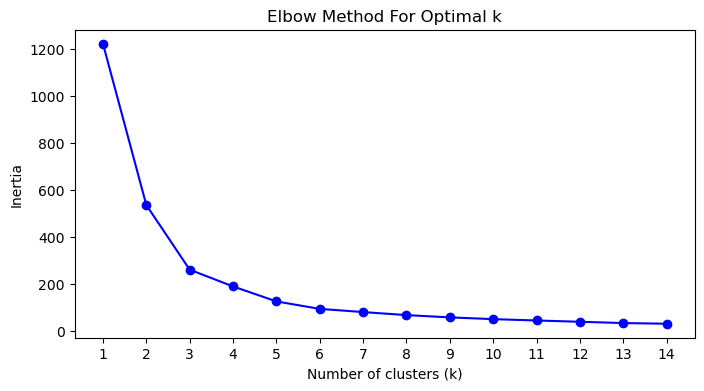

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k_values = range(1, 15)
inertia = []
features = grouped_scaled.iloc[:,1:]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.show()

**As Inertia drops steeply from k=1 to k=3, then flattens out.The elbow is around k = 3 or 4, which is a strong indicator of a good cluster count.**
>
**We can select 3 as optimum number of clusters**

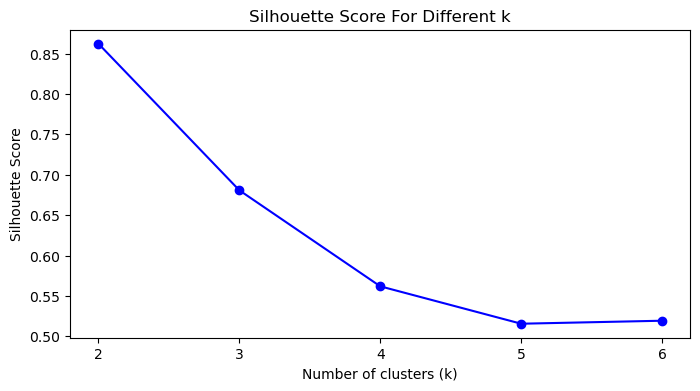

In [39]:
from sklearn.metrics import silhouette_score

k_values = range(2, 7)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k')
plt.xticks(k_values)
plt.show()

**The highest score appears at k = 2, but it’s very close to k = 3.**
>
**Silhouette analysis indicates that k = 2 or 3 offers the best-defined clusters, with k = 3 aligning with the elbow method result
and offering more nuanced groupings.**

In [40]:

pairplot_features = features
pairplot_features['Distance'] = grouped['Average_distance' ]
pairplot_features['Room Number'] = grouped['Average_rooms' ]
pairplot_features['Price'] = grouped['Average_price' ]
pairplot_features['Price_M'] = grouped['Median_price' ]

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(features)
features['cluster'] = kmeans.labels_


# This last part has been created for you - ensure you do not change this part to maintain continuity with other sections.
grouped_scaled['y_pred'] = kmeans.labels_

grouped_scaled.head()

,Postcode,Average_Capacity,Average_installation,y_pred
0,3000,-0.270347,-0.668151,0
1,3000,-0.172778,-0.659206,2
2,3000,-0.194797,-0.694986,0
3,3002,-0.683930,-0.641316,2
4,3002,-0.693858,-0.659206,2


## 5. Hypothesis Development and Significance Testing

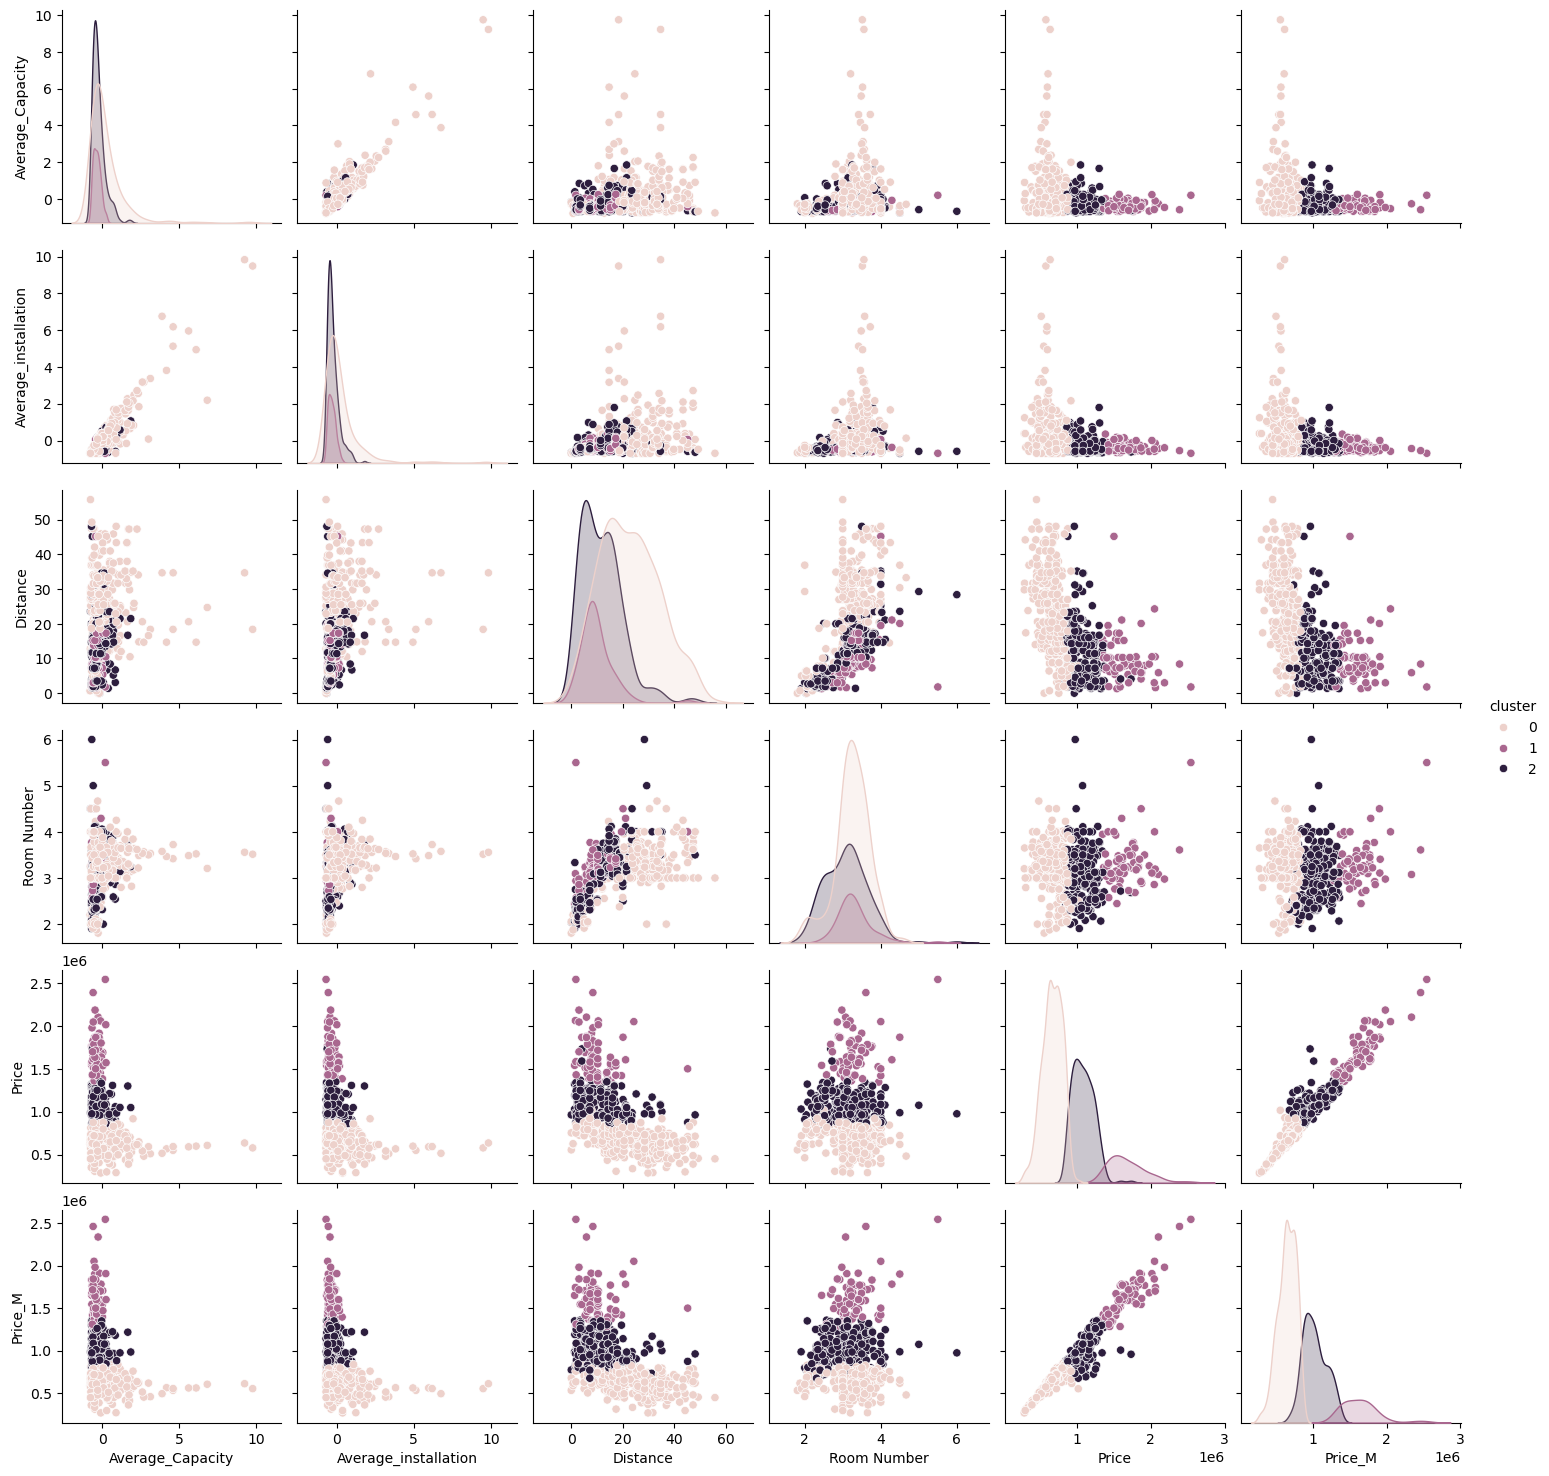

In [41]:
sns.pairplot(pairplot_features, hue='cluster')


In [42]:
grouped['cluster'] = features['cluster']  # Add cluster info to the original data

In [43]:
cluster_summary = grouped.groupby('cluster').agg({
    'Average_price': 'mean',
    'Median_price': 'mean',
    'Average_rooms': 'mean',
    'Average_distance': 'mean',
    'Average_Capacity': 'mean',
    'Average_installation': 'mean',
}).reset_index()
cluster_summary 


,cluster,Average_price,Median_price,Average_rooms,Average_distance,Average_Capacity,Average_installation
0,0,6.617719e+05,6.431324e+05,3.239509,22.683180,62.537879,9.673348
1,1,1.676383e+06,1.633403e+06,3.308397,9.841429,28.040813,4.439294
2,2,1.080550e+06,1.020830e+06,3.086651,11.720465,34.037959,5.118825


In [44]:
price_cluster0 = grouped[grouped['cluster'] == 0]['Average_price'].dropna()
price_cluster1 = grouped[grouped['cluster'] == 1]['Average_price'].dropna()

In [45]:
round(price_cluster0.mean(),2),round(price_cluster1.mean(),2)

(661771.89, 1676383.13)

##  Hypothesis Formulation
Based on the pairplot we can formulate a hypothesis:
### Ho = The average house price of cluster 0 is assumed to be the same as cluster 1
>
### H1 = The average house price of cluster 0 and cluster 1 are not the same.

In [46]:
from scipy.stats import ttest_ind

In [47]:
ttest_ind(price_cluster0, price_cluster1, equal_var=False)

TtestResult(statistic=-32.79855563869981, pvalue=3.453385076866505e-47, df=77.48274402887851)

**The difference in average house price between two clusters is  statistically significant at p < 0.001. Thus, we reject the null hypothesis (H₀: no difference in means) and accept the alternative hypothesis (H₁: the means are different). This confirms that your KMeans clustering has successfully separated suburbs with distinct housing price characteristics.**

## 6. Conclusions and Recommendations
>
**Cluster 0 represents Outer Suburbs, Lower Price, Higher Solar**
>
**Cluster 1 represents inner Suburbs, Highest average price, lower Solar**
>
**Cluster 2 represents Cluster 2 – Mid-tier, Middle Suburbsr**


>
**Cluster 0 (outer suburbs): Could be prioritized for affordable solar programs, possibly scalable battery storage or community-level solar microgrids.**
>
**Cluster 1 (inner city, high price): Focus on shared solar schemes, tax incentives, or policy reform for multi-dwelling buildings.**

